In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import cv2
import PIL
import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [ ]:
tf.config.experimental.list_physical_devices('GPU')

In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 57s 0us/step


In [8]:
IMAGE_SHAPE = (224, 224)

In [9]:
mobile_net_v2_model = tf.keras.applications.MobileNetV2(
    input_shape=IMAGE_SHAPE + (3,),
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

14536120/14536120 [==============================] - 3s 0us/step


In [10]:
classifier = tf.keras.Sequential([
    mobile_net_v2_model

])

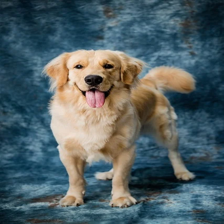

In [14]:
gold_fish = Image.open("dog-8198719_640.webp").resize(IMAGE_SHAPE)
gold_fish

In [15]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [16]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [17]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 2s 2s/step


(1, 1000)

In [18]:
result

array([[5.21032707e-05, 3.96779033e-05, 2.17060842e-05, 1.67593480e-05,
        3.11400399e-05, 2.63320544e-05, 3.51344424e-05, 2.98838331e-05,
        2.66391962e-05, 1.40398106e-05, 4.08953529e-05, 5.25310570e-05,
        4.19129356e-05, 3.05953399e-05, 3.39555663e-05, 2.20163456e-05,
        2.51029414e-05, 3.69763293e-05, 1.34972297e-05, 7.23264311e-05,
        4.23001184e-05, 4.84597367e-05, 6.60303049e-05, 9.45556312e-05,
        1.07951482e-05, 2.89883901e-05, 2.17725719e-05, 1.61027729e-05,
        3.10912546e-05, 1.11206391e-05, 1.07698368e-04, 1.85464833e-05,
        2.75824168e-05, 1.11337707e-04, 1.13674600e-04, 9.07013236e-05,
        2.33026913e-05, 1.14121749e-05, 9.62359263e-05, 4.05472420e-05,
        2.50782723e-05, 6.36438635e-05, 3.08858944e-05, 4.85907476e-05,
        4.91698011e-05, 2.45104202e-05, 3.95664720e-05, 2.78754960e-05,
        2.80754575e-05, 5.04438103e-05, 6.41055449e-05, 3.83860970e-05,
        2.46361014e-05, 2.99122330e-05, 5.06948782e-05, 2.011227

In [19]:
predicted_label_index = np.argmax(result)
predicted_label_index

207

In [20]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

10484/10484 [==============================] - 0s 0us/step


In [21]:
imagenet_labels[predicted_label_index+1]

'golden retriever'

In [22]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [23]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [24]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [25]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [26]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

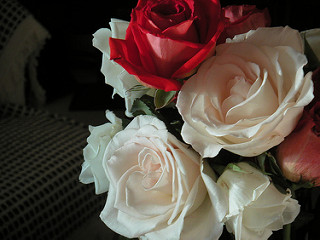

In [27]:
PIL.Image.open(str(roses[1]))

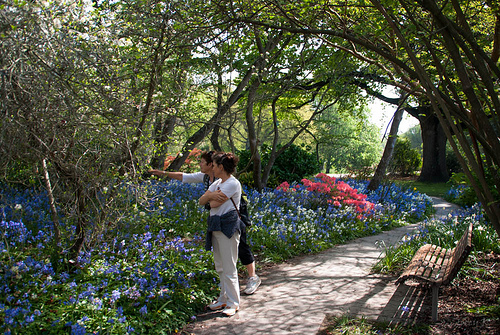

In [28]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

In [30]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [31]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [32]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [33]:
img.shape

(240, 179, 3)

In [34]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [35]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [36]:
X = np.array(X)
y = np.array(y)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [39]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [40]:
IMAGE_SHAPE

(224, 224)

In [41]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

In [42]:
x0_resized.shape

(224, 224, 3)

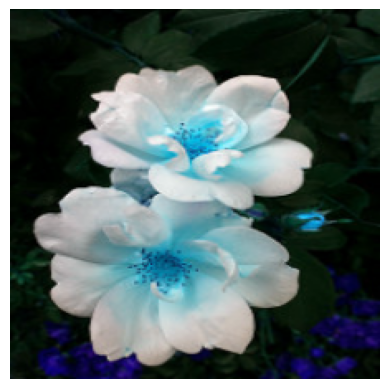

In [43]:
plt.axis('off')
plt.imshow(X[0])

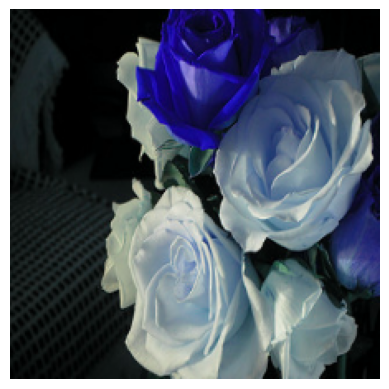

In [44]:
plt.axis('off')
plt.imshow(X[1])

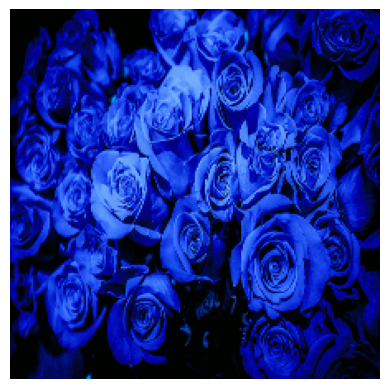

In [45]:
plt.axis('off')
plt.imshow(X[2])

In [46]:
results = classifier.predict(np.array([X[0],X[1],X[2]]))

1/1 [==============================] - 2s 2s/step


In [47]:
predicted = np.argmax(results, axis=1)

In [48]:
predicted

array([794, 721, 443], dtype=int64)

In [49]:
imagenet_labels[predicted[0]+1]

'shower curtain'

In [50]:
imagenet_labels[predicted[1]+1]

'pillow'

In [51]:
imagenet_labels[predicted[2]+1]

'bib'

In [52]:
# Load MobileNetV2 pre-trained on ImageNet without the top layer
pretrained_model_without_top_layer = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

9406464/9406464 [==============================] - 2s 0us/step


In [53]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_of_flowers)
])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 2,230,277
Non-trainable params: 34,112
_________________________________________________________________


In [55]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [56]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 425s 5s/step - loss: 0.5870 - accuracy: 0.8023
Epoch 2/5
86/86 [==============================] - 349s 4s/step - loss: 0.3539 - accuracy: 0.8870
Epoch 3/5
86/86 [==============================] - 367s 4s/step - loss: 0.2359 - accuracy: 0.9161
Epoch 4/5
86/86 [==============================] - 346s 4s/step - loss: 0.2365 - accuracy: 0.9233
Epoch 5/5
86/86 [==============================] - 343s 4s/step - loss: 0.1786 - accuracy: 0.9390


In [57]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 22s 687ms/step - loss: 12.0330 - accuracy: 0.3736


[12.032989501953125, 0.3736383318901062]

In [65]:
X_train_scaled[0][np.newaxis,...].shape

(1, 224, 224, 3)

In [101]:
predictions = model.predict(X_train_scaled[1600][np.newaxis,...])

1/1 [==============================] - 0s 66ms/step


In [102]:

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

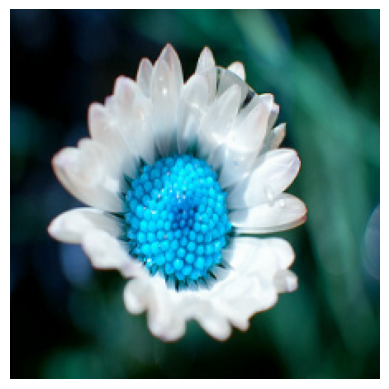

In [103]:
plt.axis('off')
plt.imshow(X_train_scaled[1600])

In [104]:
predicted_class_index

3

In [105]:
class_name = list(flowers_labels_dict.keys())[list(flowers_labels_dict.values()).index(predicted_class_index)]

print(f"Predicted class: {predicted_class_index}, Label: {class_name}")

Predicted class: 3, Label: sunflowers
